In [31]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.rcParams["figure.figsize"] = (15,10)

# Section 1.1

In [22]:
## Integrating the standard normal distribution
result = stats.norm.cdf(1)
print(result)
result2 = stats.norm.cdf(2)
print(result2)
result3 = stats.norm.cdf(5)
print(result3)

0.8413447460685429
0.9772498680518208
0.9999997133484281


The above sigmas and the result values perfectly match the values on the z-table

In [23]:
result = stats.norm.ppf(.84134)
print(result)
result2 = stats.norm.ppf(.97724968)
print(result2)
result3 = stats.norm.ppf(.999999713)
print(result3)

0.9999803859660787
1.9999965169883418
4.9997657768508095


By comparing 3 results, I get 1, 2, 5, which are the same from the integration of the normal distribution. (There is no minus sign appearing)

# Section 1.2

In [24]:
d = stats.norm.rvs(loc = 3.0, scale = .01, size = 100000)

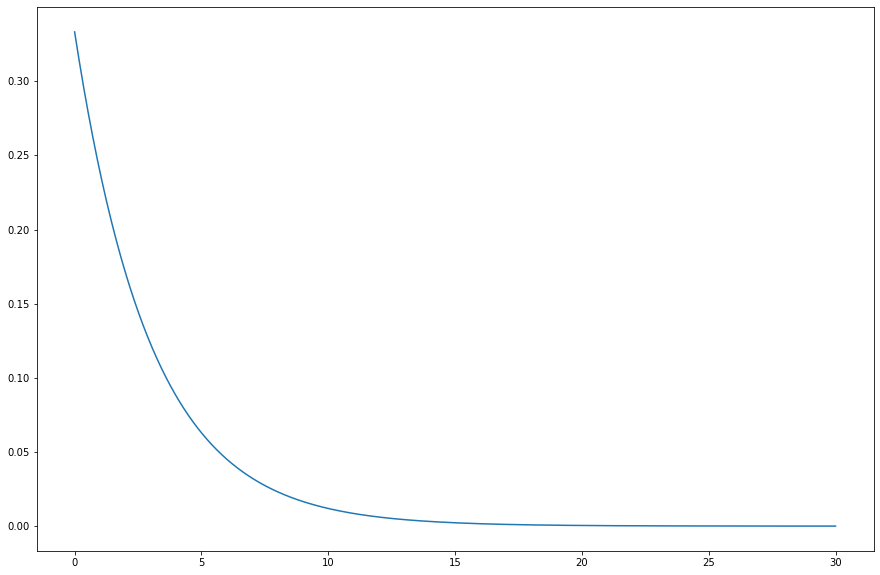

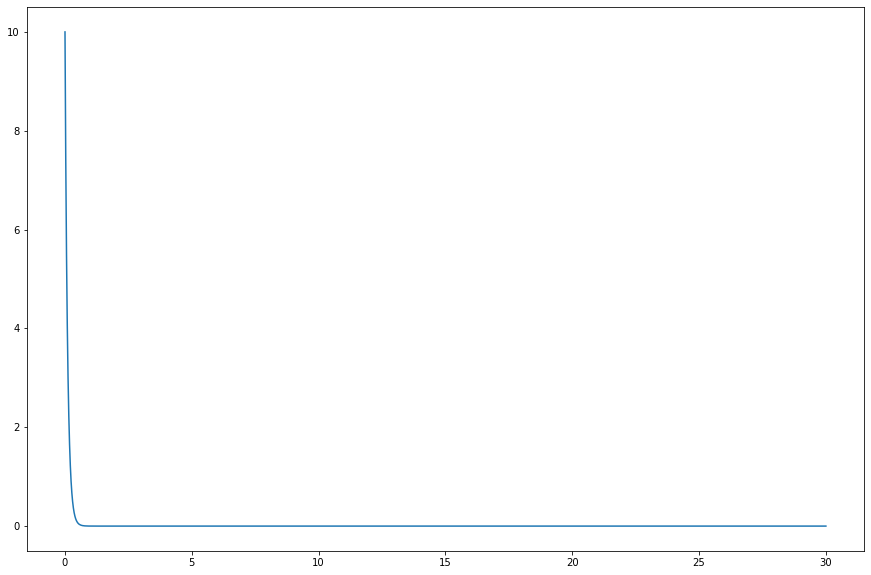

In [46]:
x = np.linspace(0,30,1000);
fig, ax = plt.subplots()
ax.plot(x, stats.expon.pdf(x, loc = 0, scale = 3))
fig, ax = plt.subplots()
ax.plot(x, stats.expon.pdf(x, loc = 0, scale = 0.1))

This is exponential distribution as it is decreasing exponentially. Here, scale refers to scale = 1 / lambda. Therefore, as the scale decreases, the lambda increases, causing the distribution to have
greater slope as you can see from the second graph (scale of 0.1)

# Section 1.3